In [2]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [3]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders1/*台紙*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders1\\2013台紙致股東.txt',
 './letterto shareholders1\\2014台紙致股東.txt',
 './letterto shareholders1\\2015台紙致股東.txt',
 './letterto shareholders1\\2016台紙致股東.txt',
 './letterto shareholders1\\2017台紙致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [4]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.382 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [1]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [7]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 股東 女士 先生 回顧 世界 經濟景氣 依舊 低迷 漿 紙業 無法展 現亮麗 業績 表現 全球 木漿 價格 如近 幾年 年初 起漲 中 回跌 年尾盤 穩 走勢 整體 而言 全 走勢 起伏 不 大 展望 預測 全球 經濟 成長 率 高 惟因 美國 財政經濟問 题及 聯準 會 政策 疑慮 未除 產業界持 保守 態度 就 木漿 價格 走勢 而言 專業织織 預測 南美洲 新漿 廠 投產 壓力 將 可能 造成 上半年 回跌 修正 下半年 回 穩後逐漸 回升 到 目前 以上 水準 文化 用纸 則因 全球 電子化 影響 及亞洲 地區 產能 有待 消化 市場 競爭 依然 激烈 此 已持續 降低 印刷 書寫 用紙 之產銷 比重 因應 化工 產品 方面 受惠 部份 國外 競爭 廠家 因故 停 產 以及 太陽能 面板 業景氣 回温 有利 因素 呈 現供 不 應求 之榮景 此外 全球 鉀肥 聯盟 之一 出現 分裂 而 造成 原料 氯化 鉀價格 下跌 將可 提升 產品 利益 預期 化工 產品 在 新 應有良 好 表現 原料 採購 價格 方面 經濟 雖持續 低迷 但 主要 原料 木 與 長 纖木漿 採購 價格 預測 將略 高 氯化 鉀 原料 则 可能 微幅 下跌 新營廠 各項 產品 生產 安排 木漿 產量 與 比 較 約 減少 但 紙 製 品 由 國 內 需求 不 振 因應 產銷 平衡 全部 紙機 總產量 較 小幅 減少 左右 化工 產品則 因 液體 苛性 鉀 需求 增加 全年 產量 亦可 約 增加 木漿 全年 生產 天數 預計天 產量 噸 自用 流送 漿 除外 市售 與 半濕 漿產 品合計 噸 紙 製 品 方面 七號 抄 紙機 預估 全 產量 紧 八號 抄 纸機 預計 生產 噸 九號 抄 紙機 預計 生產 噸 合計 生產 噸 影印 纸 裁切 包裝機 與 電腦 報表紙 機等 二次 加工 紙品 產量 預計 噸 化學品 預計 生產 氫 氧化 鉀 以 計 噸 市售 液體 苛性 鉀 以 計 預計 噸 固體 苛性 鉀 以 計 噸 碳酸 鉀產量 噸 各項 產品 銷售量 木漿 預計 銷售 噸 紙張 預計 銷售 噸 化學品 主要 產品 液體 苛性 鉀 以 計 預計 銷售 噸 固體 苛性 鉀 計 預計 銷售 噸 碳酸 鉀 噸 營建事業 方面 前期 建案 龍井 三期 尚有 餘 屋戶 待售

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [8]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1160


In [9]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 1160)


<5x1160 sparse matrix of type '<class 'numpy.float64'>'
	with 1654 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [10]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
下跌 0.06715202108407897 0 24
主要 0.07033819890695947 0 49
低迷 0.06715202108407897 0 110
住宅 0.08323319925993798 0 111
價格 0.07932213082842678 0 142
入帳 0.12484979888990698 0 150
全年 0.06715202108407897 0 153
全球 0.07932213082842678 0 155
加強 0.055742243590072404 0 209
化學品 0.08323319925993798 0 218
化工 0.07033819890695947 0 220
原料 0.0937842652092793 0 244
取得 0.0836133653851086 0 260
可能 0.055742243590072404 0 269
回跌 0.08323319925993798 0 312
因應 0.08323319925993798 0 319
固體 0.08323319925993798 0 329
基地 0.06715202108407897 0 346
增加 0.059491598121320086 0 352
完工 0.10072803162611844 0 393
已售 0.08323319925993798 0 449
市售 0.08323319925993798 0 455
平板 0.08323319925993798 0 461
建案 0.08323319925993798 0 479
建照 0.06715202108407897 0 480
採購 0.06715202108407897 0 539
方面 0.2508400961553258 0 600
期戶 0.08323319925993798 0 635
木漿 0.139355608975181 0 639
業務 0.055742243590072404 0 656
氯化 0.06715202108407897 0 696
液體 0.12484979888990698 0 722
爭取 0.08323319925993798 0 761
生活 0.08323319925993798 0 7

計算 0.05675088598118141 2 996
設廠 0.05675088598118141 2 999
許的 0.05675088598118141 2 1006
議價 0.05675088598118141 2 1020
議題 0.05675088598118141 2 1021
貶值 0.05675088598118141 2 1026
買方 0.05675088598118141 2 1027
走出 0.05675088598118141 2 1034
越幣 0.05675088598118141 2 1046
趨向 0.05675088598118141 2 1047
轉強 0.05675088598118141 2 1052
逐漸 0.13735877243094555 2 1063
這些 0.05675088598118141 2 1064
這是 0.05675088598118141 2 1065
通過 0.07601345949555649 2 1066
還呈現 0.05675088598118141 2 1079
重影 0.05675088598118141 2 1087
重點 0.0915725149539637 2 1089
銷售 0.07601345949555649 2 1097
開發 0.06394491848257539 2 1105
附近 0.05675088598118141 2 1113
雙重 0.05675088598118141 2 1124
需求 0.06394491848257539 2 1127
需求量 0.17025265794354424 2 1128
韓國 0.05675088598118141 2 1135
響本 0.05675088598118141 2 1136
預計 0.06394491848257539 2 1142
食品 0.0915725149539637 2 1150
高爾夫 0.07601345949555649 2 1154
----Document 3----
一步 0.09657065995026064 3 5
一頁 0.06438043996684042 3 10
七十年 0.06438043996684042 3 11
下同 0.05194173359303322 3 20


### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [11]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders1\2013台紙致股東.txt,./letterto shareholders1\2014台紙致股東.txt,./letterto shareholders1\2015台紙致股東.txt,./letterto shareholders1\2016台紙致股東.txt,./letterto shareholders1\2017台紙致股東.txt
0,一個樂,0.041617,0.000000,0.000000,0.000000,0.000000
1,一家,0.000000,0.000000,0.056751,0.000000,0.000000
2,一年,0.000000,0.000000,0.056751,0.000000,0.000000
3,一極,0.041617,0.000000,0.000000,0.000000,0.000000
4,一次性,0.000000,0.000000,0.000000,0.032190,0.000000
5,一步,0.000000,0.000000,0.000000,0.096571,0.000000
6,一消,0.000000,0.055335,0.000000,0.000000,0.000000
7,一級,0.000000,0.000000,0.000000,0.000000,0.054392
8,一路,0.000000,0.000000,0.000000,0.032190,0.000000
9,一長,0.000000,0.055335,0.000000,0.000000,0.000000


In [12]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders1\2013台紙致股東.txt,./letterto shareholders1\2014台紙致股東.txt,./letterto shareholders1\2015台紙致股東.txt,./letterto shareholders1\2016台紙致股東.txt,./letterto shareholders1\2017台紙致股東.txt
0,一個樂,0.041617,0.000000,0.000000,0.000000,0.000000
1,一家,0.000000,0.000000,0.056751,0.000000,0.000000
2,一年,0.000000,0.000000,0.056751,0.000000,0.000000
3,一極,0.041617,0.000000,0.000000,0.000000,0.000000
4,一次性,0.000000,0.000000,0.000000,0.032190,0.000000
5,一步,0.000000,0.000000,0.000000,0.096571,0.000000
6,一消,0.000000,0.055335,0.000000,0.000000,0.000000
7,一級,0.000000,0.000000,0.000000,0.000000,0.054392
8,一路,0.000000,0.000000,0.000000,0.032190,0.000000
9,一長,0.000000,0.055335,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [13]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [14]:
tfarray=tfidf.toarray()
tfarray

array([[0.0416166 , 0.        , 0.        , ..., 0.        , 0.10072803,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08928836,
        0.        ],
       [0.        , 0.05675089, 0.05675089, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03219022, 0.        ,
        0.03219022],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [15]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個樂,1,0,0,0,0
1,一家,0,0,1,0,0
2,一年,0,0,1,0,0
3,一極,1,0,0,0,0
4,一次性,0,0,0,1,0
5,一步,0,0,0,3,0
6,一消,0,1,0,0,0
7,一級,0,0,0,0,1
8,一路,0,0,0,1,0
9,一長,0,1,0,0,0


In [16]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個樂,1,0,0,0,0
1,一家,0,0,1,0,0
2,一年,0,0,1,0,0
3,一極,1,0,0,0,0
4,一次性,0,0,0,1,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [17]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個樂,1,0,0,0,0
1,一家,0,0,1,0,0
2,一年,0,0,1,0,0
3,一極,1,0,0,0,0
4,一次性,0,0,0,1,0
5,一步,0,0,0,3,0
6,一消,0,1,0,0,0
7,一級,0,0,0,0,1
8,一路,0,0,0,1,0
9,一長,0,1,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [18]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [19]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一個樂': 1,
 '一家': 1,
 '一年': 1,
 '一極': 1,
 '一次性': 1,
 '一步': 3,
 '一消': 1,
 '一級': 1,
 '一路': 1,
 '一長': 1,
 '一頁': 2,
 '七十年': 2,
 '七號': 1,
 '三家': 5,
 '三期': 2,
 '上任': 1,
 '上半年': 3,
 '上市公司': 1,
 '上漲': 2,
 '下半年': 2,
 '下同': 3,
 '下游': 2,
 '下滑': 1,
 '下能': 1,
 '下跌': 3,
 '下降': 1,
 '不利': 2,
 '不到': 1,
 '不可或缺': 1,
 '不同': 1,
 '不好': 2,
 '不明': 1,
 '不確': 1,
 '不足': 1,
 '不跌': 1,
 '不錯': 1,
 '世界': 2,
 '並基': 1,
 '並已': 1,
 '並持': 1,
 '並持續': 1,
 '並擴': 1,
 '並未': 1,
 '並經': 1,
 '中國': 4,
 '中心': 1,
 '中旬': 1,
 '主義': 1,
 '主義國家': 1,
 '主要': 7,
 '之一': 4,
 '之下': 1,
 '之前': 1,
 '之化': 1,
 '之半數': 1,
 '之台': 1,
 '之局': 1,
 '之數據': 1,
 '之新': 1,
 '之榮景': 1,
 '之氫': 1,
 '之營': 1,
 '之營運': 1,
 '之產銷': 1,
 '之華越': 1,
 '之計畫': 1,
 '之重': 1,
 '之間': 1,
 '之首': 1,
 '九號': 1,
 '事業': 6,
 '二區': 1,
 '二期': 1,
 '二次': 1,
 '五期': 2,
 '交易': 1,
 '交易所': 1,
 '亦可': 1,
 '亦需': 1,
 '人員': 1,
 '人工': 1,
 '人数': 1,
 '人數': 1,
 '今年': 2,
 '今後發展': 1,
 '介為生': 1,
 '仍將': 1,
 '仍待進': 1,
 '仍然': 2,
 '仍維持': 1,
 '仍舊': 1,
 '仍須': 1,
 '以上': 3,
 '以來': 1,
 '以利': 1,
 '以及': 3,
 '以期': 1,
 '以落'

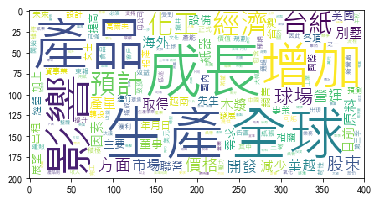

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [21]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('成長', 18),
 ('生產', 18),
 ('全球', 17),
 ('產品', 17),
 ('增加', 16),
 ('影響', 16),
 ('經濟', 16),
 ('預計', 16),
 ('化工', 15),
 ('台紙', 15),
 ('球場', 14),
 ('股東', 14),
 ('價格', 13),
 ('方面', 13),
 ('營運', 10),
 ('開發', 10),
 ('原料', 9),
 ('市場', 9),
 ('華越', 9),
 ('別墅', 8),
 ('取得', 8),
 ('因素', 8),
 ('木漿', 8),
 ('海外', 8),
 ('減少', 8),
 ('產量', 8),
 ('目前', 8),
 ('紙器', 8),
 ('美國', 8),
 ('聯營', 8)]

In [22]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfe33e48>,
 <a list of 10 Text xticklabel objects>)

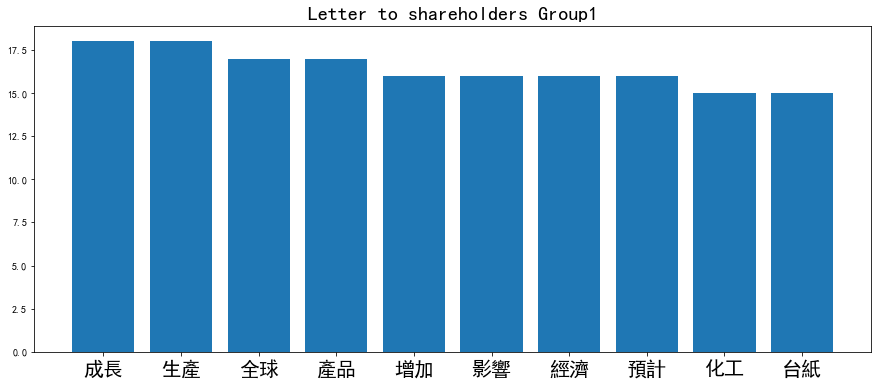

In [23]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group1",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [24]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.27956345,  0.63248131],
       [-0.4131583 ,  0.00778945],
       [-0.37392817, -0.56981397],
       [ 0.52326693, -0.26110817],
       [ 0.54338298,  0.19065138]])

No handles with labels found to put in legend.


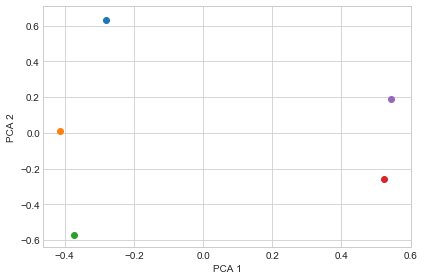

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

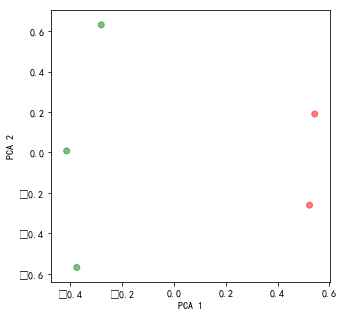

In [28]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()